# Imports

In [30]:
import pandas as pd
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Import Data

# Analysis Functions

In [51]:
def confusion_matrix(preds, truths):
    tp = 0
    fp = 0
    fn = 0
    tn = 0
    for pred, truth in zip(preds, truths):
        if truth == 1:
            if pred == truth:
                tp += 1
            else:
                fn += 1
        else:
            if pred == truth:
                tn += 1
            else:
                fp += 1
    return tp, fp, tn, fn

In [14]:
def get_precision(tp, fp):
    return tp / (tp + fp)

def get_recall(tp, fn):
    return tp / (tp + fn)

def get_accuracy(tp, fn, fp, tn):
    return (tp + tn) / (tp + fp + fn + tn)

def get_f1(tp, fp, fn):
    prec = get_precision(tp, fp)
    rec = get_recall(tp, fn)
    return 2 * prec * rec / (prec + rec)

In [19]:
def get_all_metrics(preds, truths):
    tp, fp, tn, fn = confusion_matrix(preds, truths)
    prec = get_precision(tp, fp)
    rec = get_recall(tp, fn)
    acc = get_accuracy(tp, fn, fp, tn)
    f1 = get_f1(tp, fp, fn)
    return prec, rec, acc, f1

## Prepare Training Data

In [94]:
train_df = pd.read_csv('n_train.csv')

# Get Labels
train_labels = train_df['Survived']

# Drop survived and passenger ID
train_df = train_df.drop(columns=['Survived', 'PassengerID'])

In [95]:
print(train_df)

     Pclass  Sex   Age  SibSp  Parch      Fare
0         3    0  22.0      1      0    7.2500
1         1    1  38.0      1      0   71.2833
2         3    1  26.0      0      0    7.9250
3         1    1  35.0      1      0   53.1000
4         3    0  35.0      0      0    8.0500
..      ...  ...   ...    ...    ...       ...
566       3    0  29.0      0      0    9.4833
567       2    0  52.0      0      0   13.0000
568       3    0  19.0      0      0    7.6500
569       1    1  38.0      0      0  227.5250
570       2    1  27.0      0      0   10.5000

[571 rows x 6 columns]


## Prepare Testing Data

In [97]:
test_df = pd.read_csv('n_test.csv')

# Get Labels
test_labels = test_df['Survived']

# Drop survived and passenger ID
test_df = test_df.drop(columns=['Survived', 'PassengerID'])

# Decision Tree

## Train

In [122]:
# Create and train decision tree
decision_tree = tree.DecisionTreeClassifier(max_depth=5)
decision_tree = decision_tree.fit(train_df, train_labels)

## Test

In [123]:
decision_tree_preds = decision_tree.predict(test_df)

In [124]:
dec_prec, dec_rec, dec_acc, dec_f1 = get_all_metrics(decision_tree_preds, test_labels)
print(dec_prec, dec_rec, dec_acc, dec_f1)

0.8103448275862069 0.8392857142857143 0.8601398601398601 0.8245614035087718


'iris.pdf'

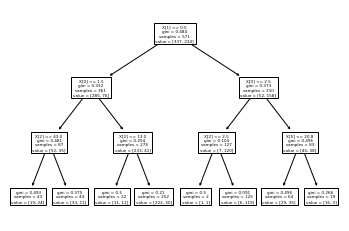

In [108]:
tree.plot_tree(decision_tree)
import graphviz 
dot_data = tree.export_graphviz(decision_tree, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris")

# Random Forest

## Train

In [149]:
rand_forest = RandomForestClassifier(max_depth=9, random_state=0)
rand_forest.fit(train_df, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

## Test

In [150]:
rand_forest_preds = rand_forest.predict(test_df)

In [151]:
rf_prec, rf_rec, rf_acc, rf_f1 = get_all_metrics(rand_forest_preds, test_labels)
print(rf_prec, rf_rec, rf_acc, rf_f1)

0.8392857142857143 0.8392857142857143 0.8741258741258742 0.8392857142857143


# Neural Network

## Train

In [172]:
neural_net = MLPClassifier(random_state=1, max_iter=500)
neural_net.fit(train_df, train_labels)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

## Test

In [173]:
neural_net_preds = neural_net.predict(test_df)
print(neural_net_preds)

[0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 1 0
 0 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1
 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0]


In [174]:
nn_prec, nn_rec, nn_acc, nn_f1 = get_all_metrics(neural_net_preds, test_labels)
print(nn_prec, nn_rec, nn_acc, nn_f1)

0.7704918032786885 0.8392857142857143 0.8391608391608392 0.8034188034188035
